<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Metadata" data-toc-modified-id="Metadata-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Metadata</a></span></li><li><span><a href="#Cluster-taxonomy" data-toc-modified-id="Cluster-taxonomy-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cluster taxonomy</a></span></li><li><span><a href="#EggNOG-mapper-annotations" data-toc-modified-id="EggNOG-mapper-annotations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>EggNOG mapper annotations</a></span><ul class="toc-item"><li><span><a href="#COG" data-toc-modified-id="COG-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>COG</a></span></li><li><span><a href="#CAZy" data-toc-modified-id="CAZy-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>CAZy</a></span></li></ul></li><li><span><a href="#KEGG-pathway" data-toc-modified-id="KEGG-pathway-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>KEGG pathway</a></span></li><li><span><a href="#Checking-key-overlap" data-toc-modified-id="Checking-key-overlap-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Checking key overlap</a></span></li></ul></li><li><span><a href="#LLMAP-on-MGnify" data-toc-modified-id="LLMAP-on-MGnify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMAP on MGnify</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Checking-key-overlap" data-toc-modified-id="Checking-key-overlap-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Checking key overlap</a></span></li><li><span><a href="#Joining" data-toc-modified-id="Joining-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Joining</a></span></li><li><span><a href="#General-distribution" data-toc-modified-id="General-distribution-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>General distribution</a></span></li><li><span><a href="#Microbe-taxonomy" data-toc-modified-id="Microbe-taxonomy-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Microbe taxonomy</a></span><ul class="toc-item"><li><span><a href="#No.-of-clusters" data-toc-modified-id="No.-of-clusters-5.2.4.1"><span class="toc-item-num">5.2.4.1&nbsp;&nbsp;</span>No. of clusters</a></span></li><li><span><a href="#Abundance" data-toc-modified-id="Abundance-5.2.4.2"><span class="toc-item-num">5.2.4.2&nbsp;&nbsp;</span>Abundance</a></span></li></ul></li><li><span><a href="#COG" data-toc-modified-id="COG-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>COG</a></span><ul class="toc-item"><li><span><a href="#COG-+-Phylum" data-toc-modified-id="COG-+-Phylum-5.2.5.1"><span class="toc-item-num">5.2.5.1&nbsp;&nbsp;</span>COG + Phylum</a></span></li></ul></li><li><span><a href="#KEGG" data-toc-modified-id="KEGG-5.2.6"><span class="toc-item-num">5.2.6&nbsp;&nbsp;</span>KEGG</a></span><ul class="toc-item"><li><span><a href="#KEGG-+-Phylum" data-toc-modified-id="KEGG-+-Phylum-5.2.6.1"><span class="toc-item-num">5.2.6.1&nbsp;&nbsp;</span>KEGG + Phylum</a></span></li></ul></li><li><span><a href="#CAZy" data-toc-modified-id="CAZy-5.2.7"><span class="toc-item-num">5.2.7&nbsp;&nbsp;</span>CAZy</a></span><ul class="toc-item"><li><span><a href="#No.-of-clusters" data-toc-modified-id="No.-of-clusters-5.2.7.1"><span class="toc-item-num">5.2.7.1&nbsp;&nbsp;</span>No. of clusters</a></span></li><li><span><a href="#Abundance-of-clusters" data-toc-modified-id="Abundance-of-clusters-5.2.7.2"><span class="toc-item-num">5.2.7.2&nbsp;&nbsp;</span>Abundance of clusters</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Estimate the distribution of gene clusters across metagenome datasets
* Method
  * Create a diamond database of all gene clusters
  * Map reads from the multi-species data to the cluster database
  * Estimate gene abundances:
    * `>= 80% of target covered`
    * `reads per kilobase of target (RPK)`

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/abund/'

# gene cluster rep sequences
clust_rep_seq_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/clusters_rep-seqs.faa'

# Post-QC metagenome reads
## multi-species
multiSpec_samps_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/Georg-animal/samples.tsv'
multiSpec_meta_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'
## MGnify env-host
MGnify_samps_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/samples.tsv'

# cluster dir
clust_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome',
                      'multi-study', 'BioProjects', 'merged', 'linclust50')

# params
threads = 12

# Init

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(dtplyr)
library(tidytable)
library(LeyLabRMisc)

In [3]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/abund/ 


# Load

## Metadata

In [54]:
MGnify_meta = fread(MGnify_samps_file, sep='\t') %>%
    dt_select(Sample, biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    dt_filter(biome_1 != 'Engineered')
MGnify_meta

Sample,biome_0,biome_1,biome_2,biome_3,biome_4,biome_5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERS723591,root,Host-associated,Mammals,Digestive system,Large intestine,Fecal
ERS723612,root,Host-associated,Mammals,Digestive system,Large intestine,Fecal
⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERS970222,root,Host-associated,Mammals,Digestive system,Large intestine,Fecal
ERS970335,root,Host-associated,Mammals,Digestive system,Large intestine,Fecal


## Cluster taxonomy

In [5]:
# reading in taxonomy table
## WARING: slow
F = file.path(clust_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
#cmd = glue::glue('gunzip -c {file} | head -n 100000', file=F) 
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'X')
tax = fread(cmd=cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    dt_separate(lineage, into=levs, sep=':') %>%
    dt_filter(!is.na(Domain), !is.na(Phylum)) %>%
    dt_select(-X, -taxID, -rank, -spp) %>%
    dt_rename(seqid = seqID)
tax 

seqid,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4f509c5351da4782bcba565a798e69da,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Neisseriales,Chromobacteriaceae,Microvirgula,Microvirgula aerodenitrificans
07de412a5c5743c7aec282ab947ff2a7,Bacteria,unknown,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,Helicobacter hepaticus
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ef6182b9f00f44fb83c5c5d9af931f5e,Bacteria,unknown,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Paraphotobacterium,Paraphotobacterium marinum
2497ac9df6f64aa9bcfea20fd97f7dcc,Bacteria,unknown,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Oribacterium,Oribacterium sp. oral taxon 078


## EggNOG mapper annotations

### COG

In [6]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [7]:
F = file.path(clust_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F, header=FALSE) 
COG_annot = fread(cmd=cmd, sep='\t') 
colnames(COG_annot) = cols
## separate
max_feats = COG_annot %>%
    dt_mutate(n_feats = stringr::str_length(COG_Functional_Category)) %>%
    dt_pull(n_feats) %>% max
new_cols = gsub('^', 'X', 1:(max_feats))
COG_annot = COG_annot %>%
    dt_select(query_name, COG_Functional_Category) %>%
    dt_separate(COG_Functional_Category, into=new_cols, sep='') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='COG_cat') %>%
    dt_filter(!is.na(COG_cat)) %>%
    dt_select(-X) %>%
    dt_rename(seqid = query_name)
COG_annot 

seqid,COG_cat
<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,C
186964524ed64aa9a1c5f88f4819c8a2,E
⋮,⋮
2d94a00648f14a11aac5167a761130a0,Z
379a71c7de62478db061c09cf413a4d6,Z


In [8]:
# Loading function group descriptions
COG_func_cat_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/COG_cateogories.tsv'
COG_func_cat = fread(COG_func_cat_file, sep='\t') %>%
    dt_rename(COG_cat = COG_category)
COG_func_cat

COG_cat,Functional_description,Functional_group
<chr>,<chr>,<chr>
D,"Cell cycle control, cell division, chromosome partitioning",Cellular processes and signaling
M,Cell wall/membrane/envelope biogenesis,Cellular processes and signaling
⋮,⋮,⋮
R,General function prediction only,Poorly characterized
S,Function unknown,Poorly characterized


In [9]:
# checking key overlap
overlap(COG_annot %>% dt_pull(COG_cat),
        COG_func_cat %>% dt_pull(COG_cat))

intersect(x,y): 24 
setdiff(x,y): 0 
setdiff(y,x): 1 
union(x,y): 25 


In [10]:
# joining
COG_annot = COG_annot %>%
    dt_left_join(COG_func_cat, c('COG_cat'))
COG_annot

seqid,COG_cat,Functional_description,Functional_group
<chr>,<chr>,<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,C,Energy production and conversion,Metabolism
186964524ed64aa9a1c5f88f4819c8a2,E,Amino acid transport and metabolism,Metabolism
⋮,⋮,⋮,⋮
2d94a00648f14a11aac5167a761130a0,Z,Cytoskeleton,Cellular processes and signaling
379a71c7de62478db061c09cf413a4d6,Z,Cytoskeleton,Cellular processes and signaling


### CAZy

In [11]:
F = file.path(clust_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F, header=FALSE) 
CAZy_annot = fread(cmd=cmd, sep='\t') 
colnames(CAZy_annot) = cols
## separate
max_feats = CAZy_annot %>%
    dt_distinct(CAZy) %>% 
    dt_mutate(n_feats = stringr::str_count(CAZy, ',')) %>%
    dt_pull(n_feats) %>% max
new_cols = gsub('^', 'X', 1:(max_feats + 1))
CAZy_annot = CAZy_annot %>%
    dt_select(query_name, CAZy) %>%
    dt_separate(CAZy, into=new_cols, sep=',') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='CAZy') %>%
    dt_filter(!is.na(CAZy)) %>%
    dt_select(-X) %>%
    dt_rename(seqid = query_name) %>%
    dt_mutate(CAZy_module = gsub('[0-9]+$', '', CAZy),
              CAZy = gsub('^([^0-9]+)([0-9])$', '\\10\\2', CAZy),
              CAZy = gsub('^([^0-9]+)([0-9][0-9])$', '\\10\\2', CAZy))
CAZy_annot 

seqid,CAZy,CAZy_module
<chr>,<chr>,<chr>
96efcedb381249668f99b3b58e619fac,GH013,GH
6548fb2615a44a5eb90c3cd0eb18a3ef,GT004,GT
⋮,⋮,⋮
4e63c868cdbc46118e66d3a6f7a0f479,PL008,PL
d2e507606ee64a9e9bb990007a3f5d47,PL008,PL


In [12]:
# how many clusters with CAZy annot?
CAZy_annot %>% dt_distinct(seqid)

seqid
<chr>
96efcedb381249668f99b3b58e619fac
6548fb2615a44a5eb90c3cd0eb18a3ef
⋮
ada063f4a0db4b5689823c4b03393afb
6c9bb9087e3441cd84a61778e14c6924


## KEGG pathway

In [13]:
# KEGG pathways
## Reading file
F = file.path(clust_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
#cmd = glue::glue('gunzip -c {file} | head -n 10000', file=F, header=FALSE) 
KEGG_ptw = fread(cmd=cmd, sep='\t') 
colnames(KEGG_ptw) = cols
## Formatting
KEGG_ptw = KEGG_ptw %>%
    dt_select(query_name, KEGG_Pathway) %>%
    dt_mutate(KEGG_Pathway = gsub(',map.+', '', KEGG_Pathway))
## Max pathways per seqid 
max_feats = KEGG_ptw %>%
    dt_mutate(n_feats = stringr::str_count(KEGG_Pathway, ',')) %>%
    dt_pull(n_feats) %>% max
new_cols = gsub('^', 'X', 1:(max_feats+1))
## separating 
KEGG_Pathway = KEGG_ptw %>%
    dt_separate(KEGG_Pathway, into=new_cols, sep=',') %>%
    dt_pivot_longer(cols=c(-query_name), names_to='X', values_to='KEGG_pathway') %>%
    dt_select(-X) %>%
    dt_filter(!is.na(KEGG_pathway),
              !grepl('^map', KEGG_pathway)) 
KEGG_Pathway

query_name,KEGG_pathway
<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,ko00020
fee92ba1bb764d09a608d84b377a7a21,ko02010
⋮,⋮
999fde638aad466982963a1d580d4cd6,ko05231
e2e3b25725e144d0b8887d5f0bce650c,ko05231


In [14]:
# using kegg ptwy mapping file from humann2 to get pathway hierarchies
ptwy_map_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/map_kegg-pwy_name_cat.txt.gz'
cmd = glue::glue('gunzip -c {file}', file=ptwy_map_file)
ptwy_map = fread(cmd=cmd, sep='\t', header=FALSE)
colnames(ptwy_map) = c('KEGG_pathway', 'Level1', 'Level2', 'KEGG_Pathway_Name')
ptwy_map 

KEGG_pathway,Level1,Level2,KEGG_Pathway_Name
<chr>,<chr>,<chr>,<chr>
ko01100,Metabolism,Global and overview maps,Metabolic pathways Major
ko01110,Metabolism,Global and overview maps,Biosynthesis of secondary metabolites
⋮,⋮,⋮,⋮
ko07114,Drug Development,Skeleton-based classification,Naphthalene family
ko07117,Drug Development,Skeleton-based classification,Benzodiazepine family


In [15]:
# joining
KEGG_Pathway = KEGG_Pathway %>%
    dt_left_join(ptwy_map, by=c('KEGG_pathway')) %>%
    dt_rename(seqid = query_name)
KEGG_Pathway

seqid,KEGG_pathway,Level1,Level2,KEGG_Pathway_Name
<chr>,<chr>,<chr>,<chr>,<chr>
6adc6c6b9ab644af811e14d8a5381fbf,ko00020,Metabolism,Carbohydrate metabolism,Citrate cycle (TCA cycle)
fee92ba1bb764d09a608d84b377a7a21,ko02010,Environmental Information Processing,Membrane transport,ABC transporters
⋮,⋮,⋮,⋮,⋮
999fde638aad466982963a1d580d4cd6,ko05231,Human Diseases,Cancer: overview,Choline metabolism in cancer
e2e3b25725e144d0b8887d5f0bce650c,ko05231,Human Diseases,Cancer: overview,Choline metabolism in cancer


## Checking key overlap

In [37]:
overlap(tax %>% dt_distinct(seqid) %>% dt_pull(seqid),
        COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 3279929 
setdiff(x,y): 482860 
setdiff(y,x): 160194 
union(x,y): 3922983 


In [38]:
overlap(tax %>% dt_distinct(seqid) %>% dt_pull(seqid),
        KEGG_Pathway %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 1487233 
setdiff(x,y): 2275556 
setdiff(y,x): 68811 
union(x,y): 3831600 


In [39]:
overlap(COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid),
        KEGG_Pathway %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 1555442 
setdiff(x,y): 1884681 
setdiff(y,x): 602 
union(x,y): 3440725 


# LLMAP on MGnify

* pipeline for creating diamond database of AA sequences and mapping reads to it

In [ ]:
# config
config_file = file.path(work_dir, 'MGnify-host-env', 'config.yaml')
cat_file(config_file)

## Run

```
(snakemake) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmap
$ screen -L -S llmap-ga ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/abund/MGnify-host-env/config.yaml 40
```

## Summary

In [1]:
# listing files
D = file.path(work_dir, 'MGnify-host-env', 'diamond_blastx')
rpk_files = list_files(D, 'dmnd_RPK.tsv')
rpk_files %>% length
rpk_files %>% head(n=3)

ERROR: Error in file.path(work_dir, "MGnify-host-env", "diamond_blastx"): object 'work_dir' not found


In [ ]:
# reading in files
read_tbl = function(F){
    sample = basename(dirname(F))
    df = fread(F, sep='\t') %>%
        dt_mutate(frac_abund = ifelse((frac_pos < 0|is.na(frac_pos)), 0, frac_pos)) %>%
        dt_filter(frac_abund > 0) %>%
        dt_select(-slen, -num_reads_hit, -mean_coverage)
    df$Sample = sample
    return(df)
}

doParallel::registerDoParallel(4)
rpk = rpk_files %>%
    head(n=20) %>%    # debug
    as.list %>%
    plyr::llply(read_tbl, .parallel=TRUE) %>%
    rbindlist(use.names = TRUE) %>%
    dt_mutate(total_abund = sum(frac_abund),
              by=list(sseqid)) %>%
    dt_filter(total_abund > 0) %>%
    dt_select(-total_abund) %>%
    dt_mutate(frac_abund = frac_abund * 100) %>%
    dt_rename(seqid = sseqid,
              perc_abund = frac_abund) 
    
rpk %>% dt_pull(seqid) %>% unique %>% length %>% cat('Number of clusters:', ., '\n')
rpk

In [ ]:
# checking abundance distribution
rpk %>% 
    dt_pull(perc_abund) %>% 
    summary_x('perc. abund.')

### Checking key overlap

In [57]:
# w/ sample metadata
overlap(rpk %>% dt_distinct(Sample) %>% dt_pull(Sample),
        MGnify_meta %>% dt_distinct(Sample) %>% dt_pull(Sample))

intersect(x,y): 14 
setdiff(x,y): 6 
setdiff(y,x): 269 
union(x,y): 289 


In [58]:
# w/ COG
overlap(rpk %>% dt_distinct(seqid) %>% dt_pull(seqid),
        COG_annot %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 1328420 
setdiff(x,y): 59771 
setdiff(y,x): 2111703 
union(x,y): 3499894 


In [59]:
# w/ KEGG
overlap(rpk %>% dt_distinct(seqid) %>% dt_pull(seqid),
        KEGG_Pathway %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 697297 
setdiff(x,y): 690894 
setdiff(y,x): 858747 
union(x,y): 2246938 


In [60]:
# w/ taxonomy
overlap(rpk %>% dt_distinct(seqid) %>% dt_pull(seqid),
        tax %>% dt_distinct(seqid) %>% dt_pull(seqid))

intersect(x,y): 1308498 
setdiff(x,y): 79693 
setdiff(y,x): 2454291 
union(x,y): 3842482 


### Joining

In [61]:
# adding taxonomy & filtering to ID'ed as arch/bac/virus
rpk = rpk %>%
    dt_left_join(tax, by=c('seqid')) %>%
    dt_filter(Domain %in% c('Archaea', 'Bacteria', 'Viruses'), 
              !is.na(Phylum)) %>%
    dt_filter(!Phylum %in% c('uc_Bacteria', 'uc_Archaea', 'unknown'))
rpk %>% dt_pull(perc_abund) %>% summary

## re-normalize after filtering
rpk = rpk %>%
    dt_mutate(total_RPK = sum(RPK),
              by = list(Sample)) %>%
    dt_mutate(perc_abund = RPK / total_RPK * 100) %>%
    dt_select(-total_RPK)
rpk %>% dt_pull(perc_abund) %>% summary

## summary
rpk %>% dt_pull(seqid) %>% unique %>% length %>% cat('Number of clusters:', ., '\n')
rpk

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6745 22.5352 37.5000 41.8960 57.8947 99.8675 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
5.300e-07 3.414e-05 8.169e-05 2.131e-04 2.252e-04 3.805e-02 

Number of clusters: 1226260 


seqid,frac_pos,RPK,perc_abund,Sample,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
dcff9aa082c049cc863f015dd20ef549,0.752475,59.40594,0.0001356460,DRS034400,Bacteria,unknown,Proteobacteria,Gammaproteobacteria,Alteromonadales,Moritellaceae,Moritella,Moritella sp. JT01
d6eae76161534a5aa4084e15e454f565,0.825503,107.38255,0.0002451945,DRS034400,Bacteria,unknown,Proteobacteria,Gammaproteobacteria,Alteromonadales,Moritellaceae,Moritella,Moritella sp. JT01
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
e091cfbd832e4ad4b3a7eb3bfdd5dc39,0.223464,5.586592,1.864620e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,Zoogloeaceae,Azoarcus,Azoarcus sp. BH72
35d32a21c41a4e5989689666b4c3e896,0.272109,6.802721,2.270524e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,Zoogloeaceae,Azoarcus,Azoarcus sp. BH72


In [62]:
# adding sample metadata
rpk = rpk %>%
   dt_inner_join(MGnify_meta, by=c('Sample'))
rpk

seqid,frac_pos,RPK,perc_abund,Sample,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,biome_0,biome_1,biome_2,biome_3,biome_4,biome_5
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0169435a27c04a71868977820cd675c0,0.677812,212.7660,0.0004674332,ERS1065342,Bacteria,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides salyersiae,root,Host-associated,Mammals,Digestive system,Stomach,Rumen
243a43e7e5af4ca592268edb4500b7fb,0.492395,150.1901,0.0003299581,ERS1065342,Bacteria,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides salyersiae,root,Host-associated,Mammals,Digestive system,Stomach,Rumen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
e091cfbd832e4ad4b3a7eb3bfdd5dc39,0.223464,5.586592,1.864620e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,Zoogloeaceae,Azoarcus,Azoarcus sp. BH72,root,Environmental,Terrestrial,Soil,Desert,NA
35d32a21c41a4e5989689666b4c3e896,0.272109,6.802721,2.270524e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,Zoogloeaceae,Azoarcus,Azoarcus sp. BH72,root,Environmental,Terrestrial,Soil,Desert,NA


In [63]:
# adding COG
rpk = rpk %>%
    dt_left_join(COG_annot, by=c('seqid'))
rpk

seqid,frac_pos,RPK,perc_abund,Sample,Domain,Kingdom,Phylum,Class,Order,⋯,Species,biome_0,biome_1,biome_2,biome_3,biome_4,biome_5,COG_cat,Functional_description,Functional_group
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0169435a27c04a71868977820cd675c0,0.677812,212.7660,0.0004674332,ERS1065342,Bacteria,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,⋯,Bacteroides salyersiae,root,Host-associated,Mammals,Digestive system,Stomach,Rumen,P,Inorganic ion transport and metabolism,Metabolism
243a43e7e5af4ca592268edb4500b7fb,0.492395,150.1901,0.0003299581,ERS1065342,Bacteria,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,⋯,Bacteroides salyersiae,root,Host-associated,Mammals,Digestive system,Stomach,Rumen,P,Inorganic ion transport and metabolism,Metabolism
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
e091cfbd832e4ad4b3a7eb3bfdd5dc39,0.223464,5.586592,1.864620e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,⋯,Azoarcus sp. BH72,root,Environmental,Terrestrial,Soil,Desert,NA,S,Function unknown,Poorly characterized
35d32a21c41a4e5989689666b4c3e896,0.272109,6.802721,2.270524e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,⋯,Azoarcus sp. BH72,root,Environmental,Terrestrial,Soil,Desert,NA,S,Function unknown,Poorly characterized


In [64]:
# adding KEGG
rpk = rpk %>%
    dt_left_join(KEGG_Pathway, by=c('seqid'))
rpk

seqid,frac_pos,RPK,perc_abund,Sample,Domain,Kingdom,Phylum,Class,Order,⋯,biome_3,biome_4,biome_5,COG_cat,Functional_description,Functional_group,KEGG_pathway,Level1,Level2,KEGG_Pathway_Name
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0169435a27c04a71868977820cd675c0,0.677812,212.7660,0.0004674332,ERS1065342,Bacteria,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,⋯,Digestive system,Stomach,Rumen,P,Inorganic ion transport and metabolism,Metabolism,NA,NA,NA,NA
243a43e7e5af4ca592268edb4500b7fb,0.492395,150.1901,0.0003299581,ERS1065342,Bacteria,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,⋯,Digestive system,Stomach,Rumen,P,Inorganic ion transport and metabolism,Metabolism,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
35d32a21c41a4e5989689666b4c3e896,0.272109,6.802721,2.270524e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,⋯,Soil,Desert,NA,S,Function unknown,Poorly characterized,ko00790,Metabolism,Metabolism of cofactors and vitamins,Folate biosynthesis
35d32a21c41a4e5989689666b4c3e896,0.272109,6.802721,2.270524e-05,ERS1115236,Bacteria,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,⋯,Soil,Desert,NA,S,Function unknown,Poorly characterized,ko01100,Metabolism,Global and overview maps,Metabolic pathways Major


In [66]:
# final set of column names
rpk %>% colnames

[1] "seqid"                  "frac_pos"               "RPK"                   
 [4] "perc_abund"             "Sample"                 "Domain"                
 [7] "Kingdom"                "Phylum"                 "Class"                 
[10] "Order"                  "Family"                 "Genus"                 
[13] "Species"                "biome_0"                "biome_1"               
[16] "biome_2"                "biome_3"                "biome_4"               
[19] "biome_5"                "COG_cat"                "Functional_description"
[22] "Functional_group"       "KEGG_pathway"           "Level1"                
[25] "Level2"                 "KEGG_Pathway_Name"

In [65]:
# removing original tables to save space
# rm(tax)
# rm(COG_annot)
# rm(KEGG_Pathway)
# gc()

### General distribution

In [67]:
# No. of gene clusters
rpk %>%
    dt_distinct(seqid) 

seqid
<chr>
0169435a27c04a71868977820cd675c0
243a43e7e5af4ca592268edb4500b7fb
⋮
ba9040b68c4d48169366c69262a5a482
f21f55df860e4e0185da92d682655354


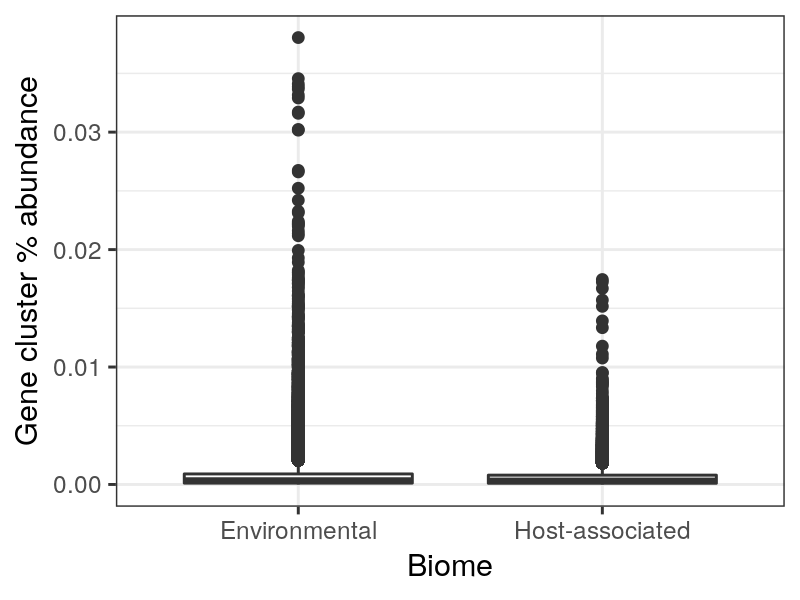

In [68]:
# plotting 
p = rpk %>%
    dt_distinct(biome_1, perc_abund) %>%
    ggplot(aes(biome_1, perc_abund)) +
    geom_boxplot() +
    labs(x='Biome', y='Gene cluster % abundance') +
    theme_bw() 

p.dims(4,3)
plot(p)

### Microbe taxonomy

In [69]:
# Number of taxonomic groups
rpk %>% dt_distinct(Domain) %>% dt_pull(Domain) %>% length %>% cat('No. of Domains:', ., '\n')
rpk %>% dt_distinct(Phylum) %>% dt_pull(Phylum) %>% length %>% cat('No. of Phyla:', ., '\n')

No. of Domains: 2 
No. of Phyla: 154 


In [70]:
# Phyla per domain 
rpk %>%
    dt_distinct(Domain, Phylum) %>%
    dt_count(Phylum, by=list(Domain)) %>%
    dt_summarize(N = sum(N), by=list(Domain))

Domain,N
<chr>,<int>
Bacteria,137
Archaea,17


#### No. of clusters

In [75]:
# Clusters per phylum + class
rpk_s = rpk %>%
    dt_distinct(Domain, Phylum, seqid, biome_1) %>%
    dt_count(Phylum, by=list(Domain, biome_1)) %>%
    dt_summarize(N = sum(N), by=list(Domain, Phylum, biome_1))

rpk_s %>% dt_pull(N) %>% summary_x('No. of clusters')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. of clusters,1,7,25.5,5606.22,137.75,479601,195337.2,79746.1


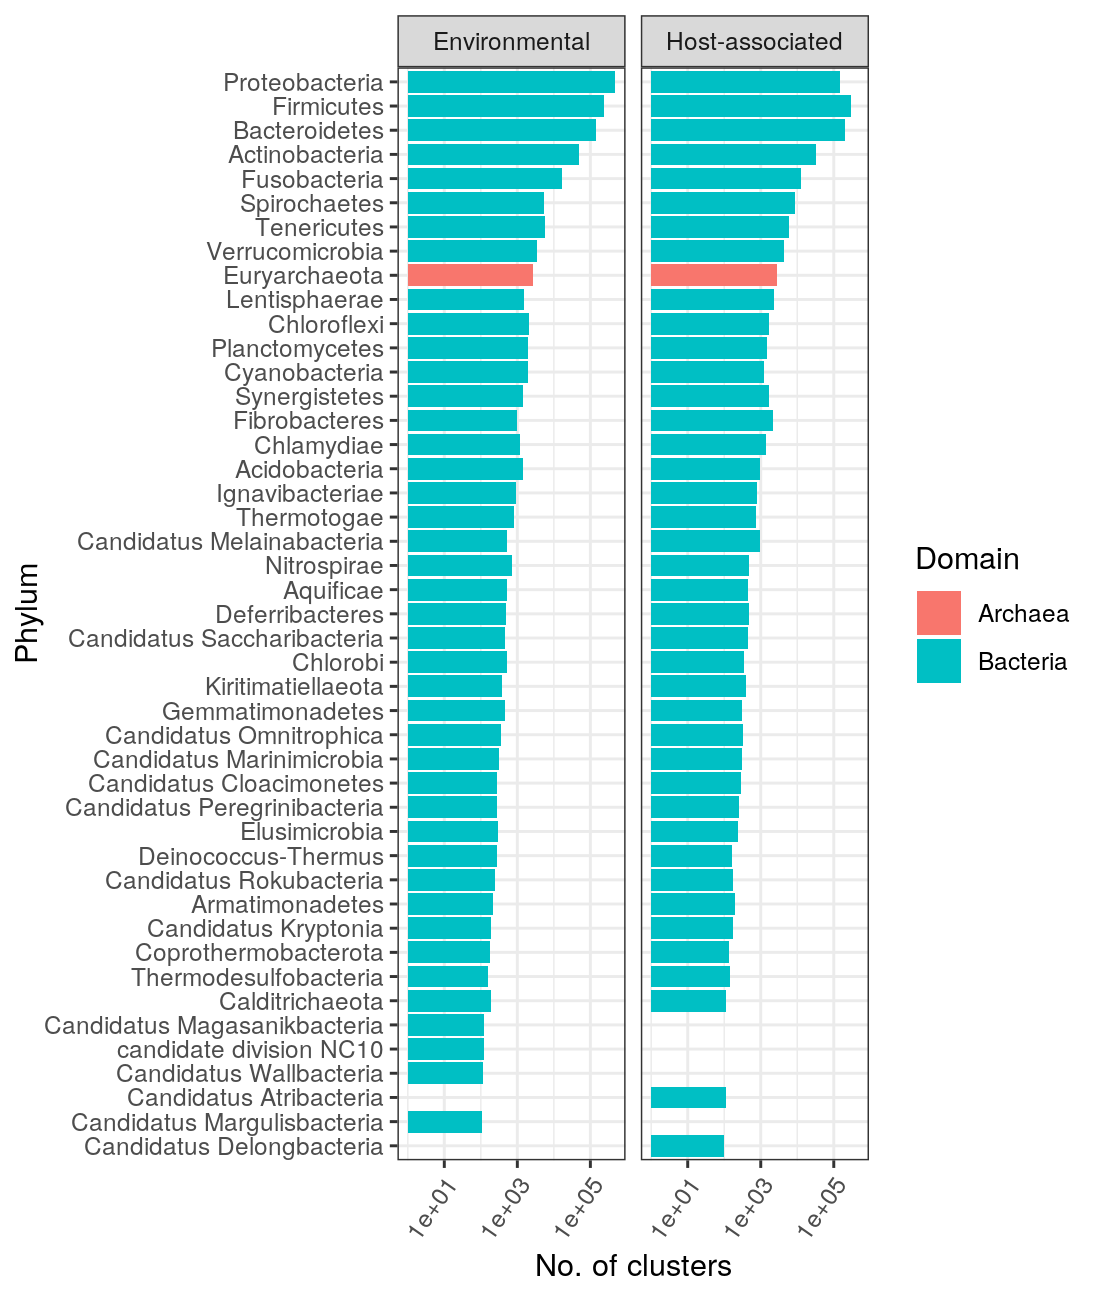

In [76]:
# plotting
p = rpk_s %>%
    dt_filter(N > 100) %>%
    dt_mutate(Phylum = reorder(Phylum, N)) %>%
    ggplot(aes(Phylum, N, fill=Domain)) +
    geom_bar(stat='identity') +
    scale_y_log10() +
    labs(y='No. of clusters') +
    facet_grid(. ~ biome_1) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    ) +
    coord_flip()

p.dims(5.5,6.5)
plot(p)

In [77]:
# Clusters per phylum and host class (non-zero abundances)
rpk_s = rpk %>%
    dt_filter(perc_abund > 0) %>%
    dt_distinct(Domain, Phylum, biome_1, seqid) %>%
    dt_count(Phylum, by=list(Domain, biome_1)) %>%
    dt_mutate(N_by_phylum = sum(N), by=list(Domain, Phylum)) %>%
    dt_summarize(N = sum(N), by=list(Domain, Phylum, biome_1, N_by_phylum))

rpk_s %>% dt_pull(N) %>% summary %>% print
rpk_s

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     1.0      7.0     25.5   5606.2    137.8 479601.0 


Domain,Phylum,biome_1,N_by_phylum,N
<chr>,<chr>,<chr>,<int>,<int>
Bacteria,Bacteroidetes,Host-associated,344675,200013
Bacteria,Spirochaetes,Host-associated,14001,8656
⋮,⋮,⋮,⋮,⋮
Bacteria,Candidatus Blackburnbacteria,Environmental,1,1
Archaea,Candidatus Aenigmarchaeota,Environmental,3,1


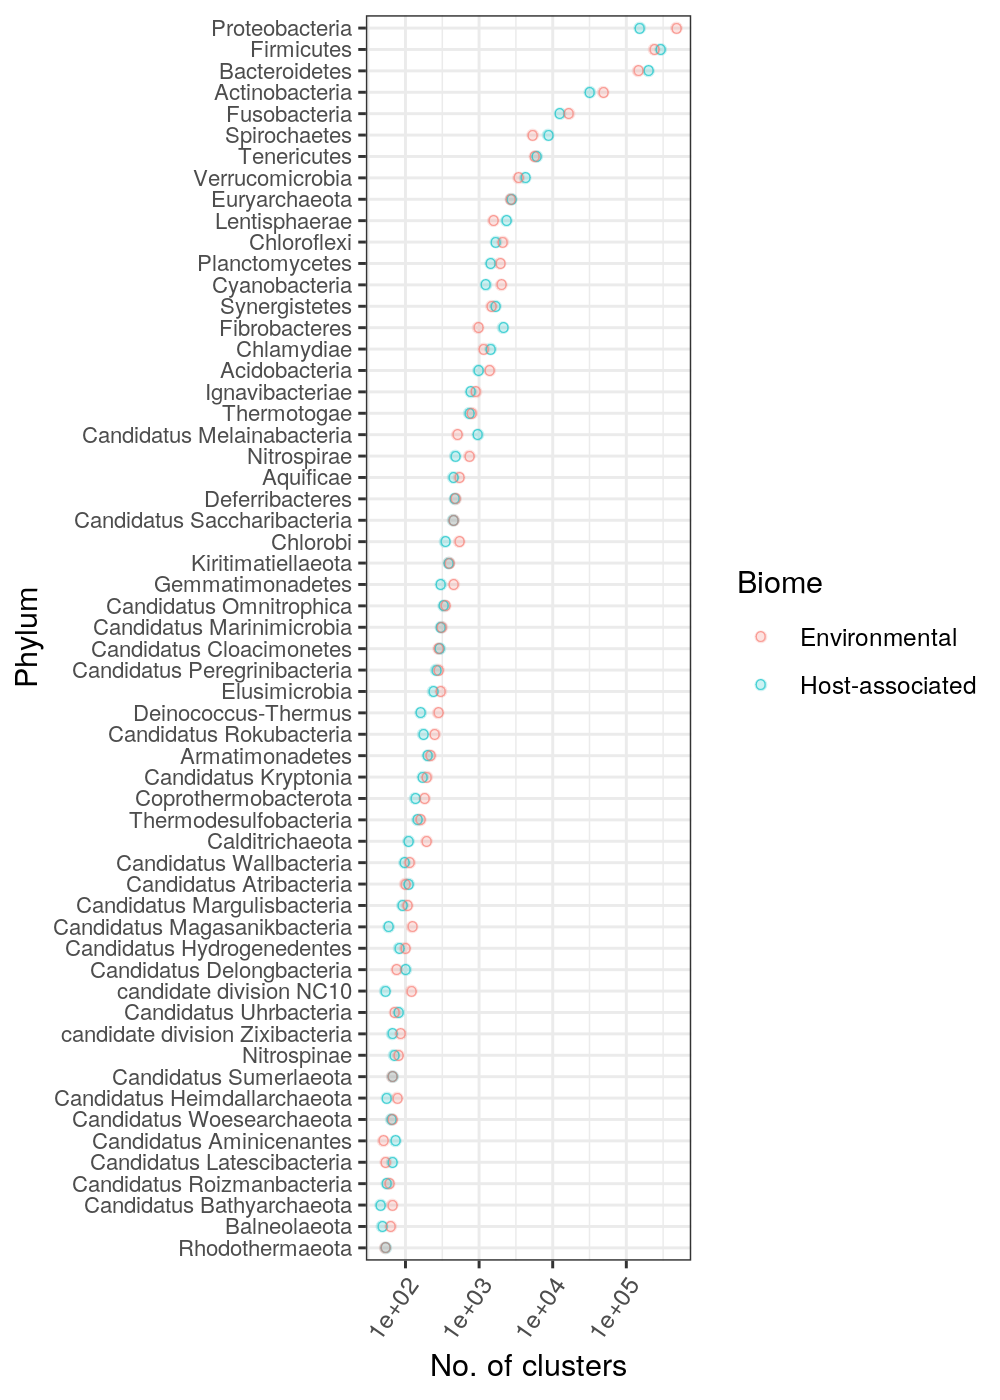

In [81]:
# plotting
p = rpk_s %>%
    dt_filter(N_by_phylum >= 100) %>%
    dt_mutate(Phylum = reorder(Phylum, N_by_phylum)) %>%
    ggplot(aes(Phylum, N, color=biome_1)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.6, shape='O') +
    scale_color_discrete('Biome') +
    scale_y_log10() +
    labs(y='No. of clusters') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=55, hjust=1)
    ) +
    coord_flip()

p.dims(5,7)
plot(p)

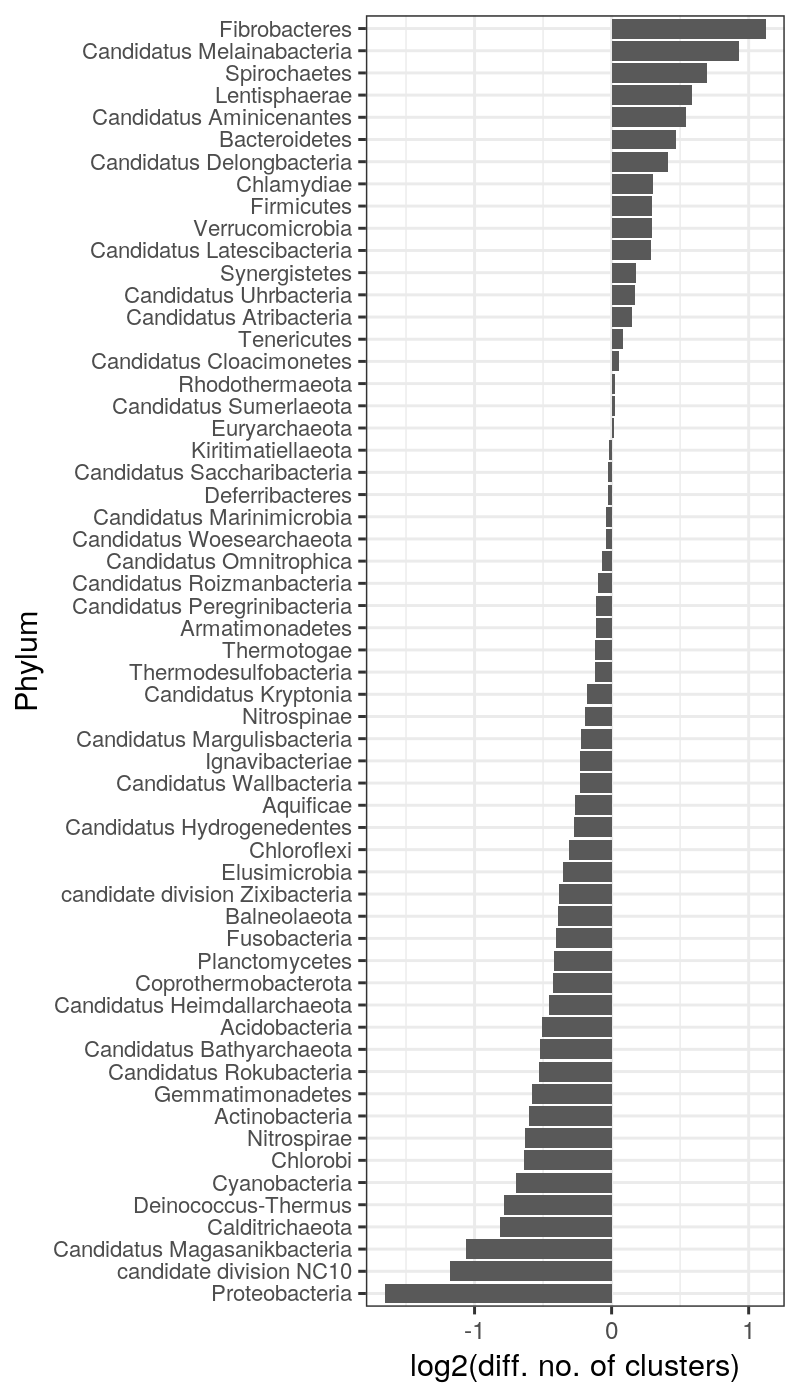

In [93]:
# plotting difference in No. of clusters
p = rpk_s %>%
    dt_filter(N_by_phylum >= 100) %>%
    dt_pivot_wider(names_from=list(biome_1), values_from=list(N)) %>%
    dt_mutate(delta_clust = log2(`Host-associated` / Environmental)) %>%
    dt_mutate(Phylum = reorder(Phylum, delta_clust)) %>%
    ggplot(aes(Phylum, delta_clust)) +
    geom_bar(stat='identity') +
    scale_color_discrete('Biome') +
    labs(y='log2(diff. no. of clusters)') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

p.dims(4,7)
plot(p)

#### Abundance

In [95]:
# summarizing
rpk_s = rpk %>%
    dt_distinct(seqid, Domain, Phylum, biome_1, perc_abund) %>%
    dt_mutate(max_abund_phylum = max(perc_abund), 
              by=list(Domain, Phylum)) %>%
    dt_summarize(mean_perc_abund = mean(perc_abund),
                 sd_perc_abund = sd(perc_abund),
                 by=list(Domain, Phylum, biome_1, max_abund_phylum)) 
    
rpk_s %>% dt_pull(mean_perc_abund) %>% summary
rpk_s %>% dt_pull(Phylum) %>% unique %>% length %>% cat('No. of Phyla:', ., '\n')
rpk_s

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
9.136e-06 1.061e-04 1.759e-04 2.121e-04 2.889e-04 1.015e-03 

No. of Phyla: 154 


Domain,Phylum,biome_1,max_abund_phylum,mean_perc_abund,sd_perc_abund
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Bacteria,Bacteroidetes,Host-associated,0.017451021,0.0003158261,0.0004124852
Bacteria,Spirochaetes,Host-associated,0.006404627,0.0001986751,0.0002620433
⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Candidatus Blackburnbacteria,Environmental,3.667769e-05,3.667769e-05,NA
Archaea,Candidatus Aenigmarchaeota,Environmental,1.236174e-04,1.236174e-04,NA


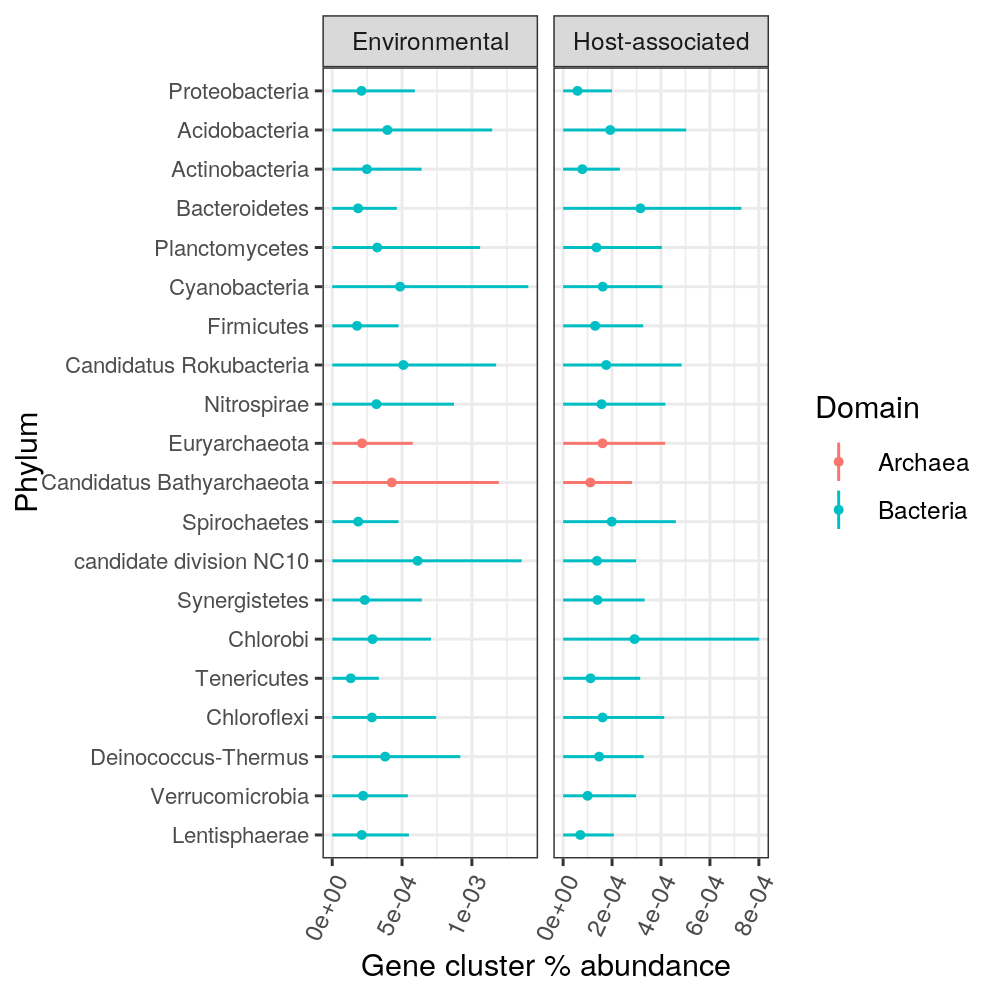

In [103]:
# plotting
p = rpk_s %>%
    dt_filter(max_abund_phylum >= 0.005) %>%
    dt_mutate(Phylum = reorder(Phylum, max_abund_phylum)) %>%
    ggplot(aes(Phylum, mean_perc_abund, color=Domain)) +
    geom_linerange(aes(ymin=ifelse(mean_perc_abund-sd_perc_abund < 0,  
                                   0, mean_perc_abund-sd_perc_abund),
                       ymax=mean_perc_abund+sd_perc_abund)) +
    geom_point(size=1) +
    scale_color_discrete('Domain') +
    labs(x='Phylum', y='Gene cluster % abundance') +
    facet_grid(. ~ biome_1, scales='free_x') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=65, hjust=1)
    ) +
    coord_flip() 

p.dims(5,5)
plot(p)

### COG

In [104]:
# distinct records: COG & class
rpk %>%
    dt_distinct(seqid, COG_cat, Functional_group, biome_1, perc_abund) 

seqid,COG_cat,Functional_group,biome_1,perc_abund
<chr>,<chr>,<chr>,<chr>,<dbl>
0169435a27c04a71868977820cd675c0,P,Metabolism,Host-associated,0.0004674332
243a43e7e5af4ca592268edb4500b7fb,P,Metabolism,Host-associated,0.0003299581
⋮,⋮,⋮,⋮,⋮
e091cfbd832e4ad4b3a7eb3bfdd5dc39,S,Poorly characterized,Environmental,1.864620e-05
35d32a21c41a4e5989689666b4c3e896,S,Poorly characterized,Environmental,2.270524e-05


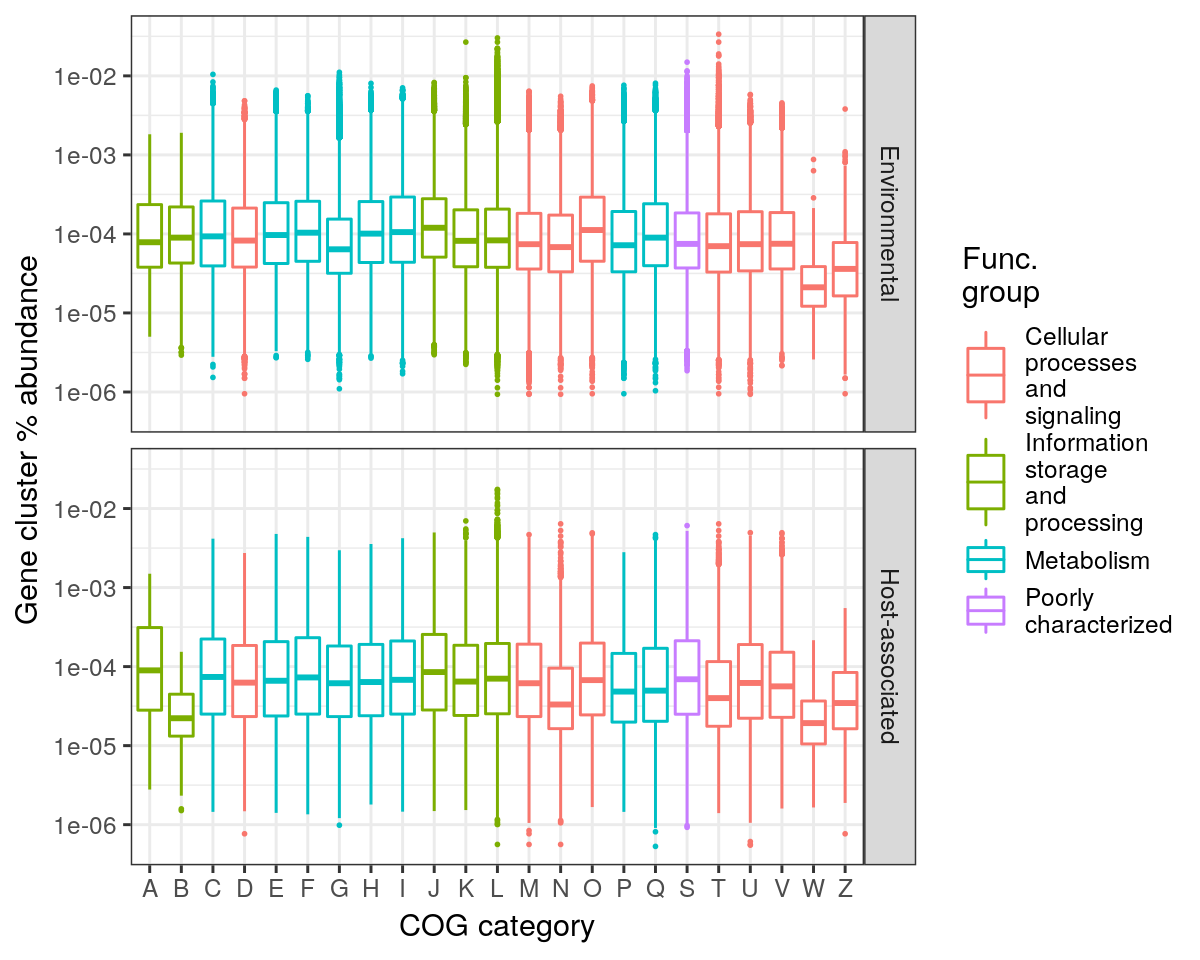

In [105]:
# plotting
# p = rpk %>%
#     dt_filter(!is.na(COG_cat)) %>%
#     dt_distinct(seqid, COG_cat, Functional_group, biome_1, perc_abund) %>%
#     dt_mutate(Functional_group = stringr::str_wrap(Functional_group, 10)) %>%
#     ggplot(aes(COG_cat, perc_abund, color=Functional_group)) +
#     geom_boxplot(outlier.size = 0.3) +
#     scale_color_discrete('Func.\ngroup') +
#     scale_y_log10() +
#     facet_grid(biome_1 ~ .) +
#     labs(x='COG category', y='Gene cluster % abundance') +
#     theme_bw()

# p.dims(6,4.8)
# plot(p)

#### COG + Phylum

In [106]:
# summarizing
rpk_s = rpk %>%
    dt_filter(!is.na(COG_cat)) %>%
    dt_distinct(seqid, COG_cat, Functional_group, 
                Domain, Phylum, biome_1, perc_abund) %>%
    dt_mutate(max_abund_COG_cat = max(perc_abund), 
              by=list(COG_cat)) %>%
    dt_mutate(max_abund_phylum = max(perc_abund), 
              by=list(Domain, Phylum)) %>%
    dt_filter(max_abund_phylum >= 0.01) %>%
    dt_summarize(mean_perc_abund = mean(perc_abund),
                 sd_perc_abund = sd(perc_abund),
                 by=list(COG_cat, Functional_group, Domain, Phylum, biome_1, 
                         max_abund_COG_cat)) 
    
rpk_s %>% dt_pull(mean_perc_abund) %>% summary
rpk_s %>% dt_pull(Phylum) %>% unique %>% length %>% cat('Number of phyla:', ., '\n')
rpk_s

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.232e-05 9.544e-05 1.638e-04 2.194e-04 2.742e-04 3.456e-03 

Number of phyla: 8 


COG_cat,Functional_group,Domain,Phylum,biome_1,max_abund_COG_cat,mean_perc_abund,sd_perc_abund
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
P,Metabolism,Bacteria,Bacteroidetes,Host-associated,0.007607907,0.0001838236,0.0002661429
G,Metabolism,Bacteria,Bacteroidetes,Host-associated,0.011096014,0.0002706814,0.0003336914
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
S,Poorly characterized,Bacteria,Candidatus Rokubacteria,Environmental,0.0149053012,1.062057e-04,1.071741e-04
W,Cellular processes and signaling,Bacteria,Bacteroidetes,Environmental,0.0008749232,6.826286e-05,9.127546e-06


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/09_LLMGAG_all_cluster/02_linclust50/.figures/fc40c890ab7df185519149d6c6bacaa1.RDS 


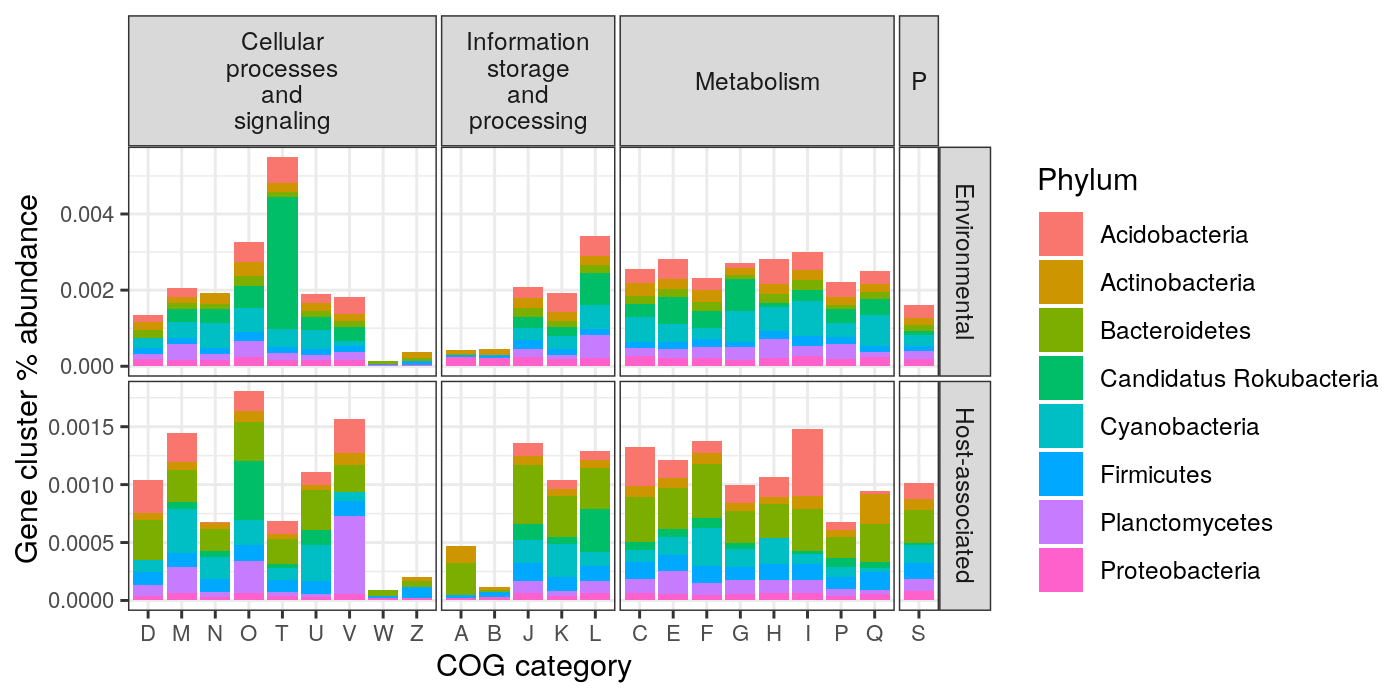

In [114]:
# plotting
p = rpk_s %>%
    dt_mutate(Functional_group = ifelse(Functional_group == 'Poorly characterized', 
                                        'P', Functional_group),
              Functional_group = stringr::str_wrap(Functional_group, 10)) %>%
    ggplot(aes(COG_cat, mean_perc_abund, fill=Phylum)) +
    geom_bar(stat='identity') +
    scale_color_discrete('Func.\ngroup') +
    facet_grid(biome_1 ~ Functional_group, scales='free', space='free_x') +
    labs(x='COG category', y='Gene cluster % abundance') +
    theme_bw() +
    theme(
        axis.text.x = element_text(size=8),
        axis.text.y = element_text(size=8),
        panel.spacing = unit(0.1, "lines")
    )

p.dims(7,3.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/09_LLMGAG_all_cluster/02_linclust50/.figures/f713a8de53964d627f8d22a841409a4e.RDS 


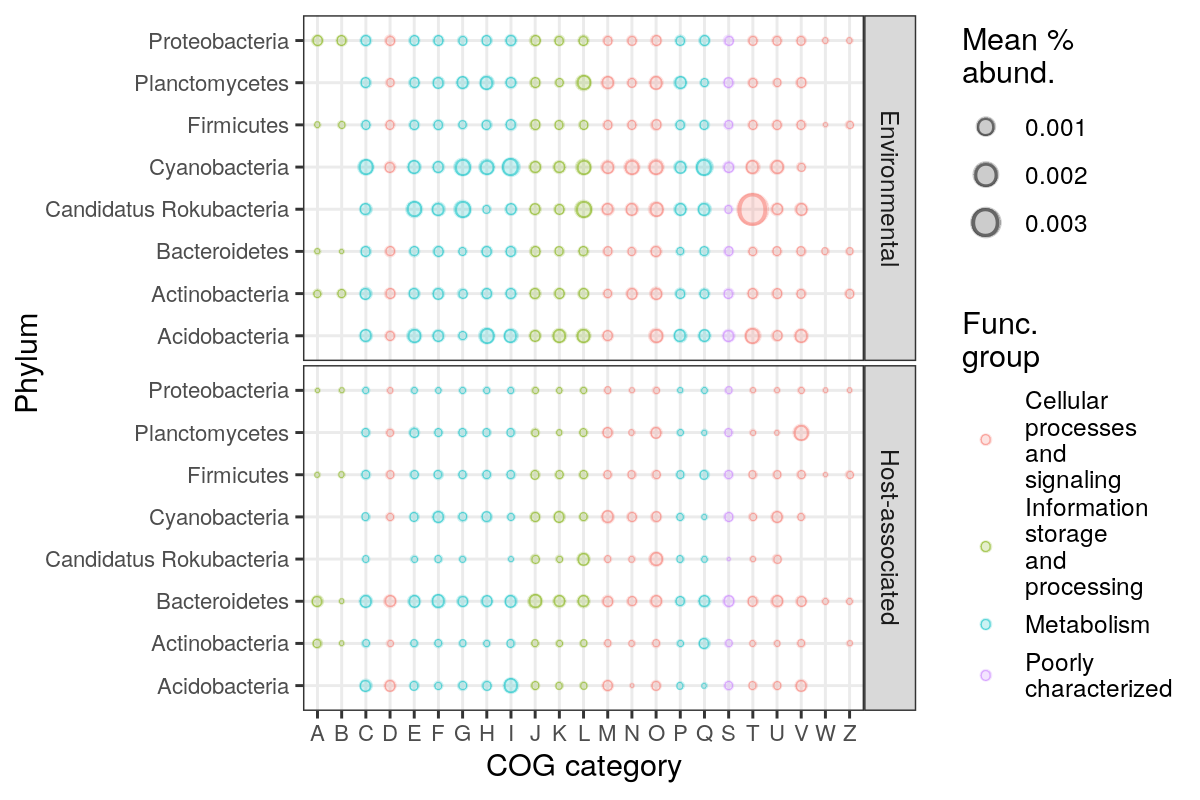

In [115]:
# plotting
p = rpk_s %>%
    dt_mutate(Functional_group = stringr::str_wrap(Functional_group, 10)) %>%
    ggplot(aes(COG_cat, Phylum, size=mean_perc_abund, color=Functional_group)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('Mean %\nabund.', range=c(0.3,5)) +
    scale_color_discrete('Func.\ngroup') +
    labs(x='COG category', y='Phylum') +
    facet_grid(biome_1 ~ ., scales='free', space='free_x') +
    theme_bw() +
    theme(
        axis.text.x = element_text(size=8),
        axis.text.y = element_text(size=8),
        panel.spacing = unit(0.1, "lines")
    )

p.dims(6,4)
Plot(p)

### KEGG

In [ ]:
# distinct records: KEGG & class
rpk %>%
    dt_filter(!is.na(KEGG_pathway)) %>%
    dt_distinct(seqid, class, KEGG_pathway, KEGG_Pathway_Name, Level1, Level2, perc_abund) 

In [ ]:
# plotting
# p = rpk %>%
#     dt_filter(!is.na(KEGG_pathway)) %>%
#     dt_distinct(seqid, class, KEGG_pathway, KEGG_Pathway_Name, Level1, Level2, perc_abund) %>%
#     dt_mutate(max_abund_pathway = max(perc_abund), 
#               by=list(KEGG_Pathway_Name)) %>%
#     dt_filter(max_abund_pathway >= 0.01) %>%
#     dt_mutate(KEGG_Pathway_Name = stringr::str_wrap(KEGG_Pathway_Name, 30),
#               Level1 = stringr::str_wrap(Level1, 12)) %>%
#     ggplot(aes(KEGG_Pathway_Name, perc_abund, color=Level1)) +
#     geom_boxplot(outlier.size = 0.3) +
#     scale_color_discrete('Func.\ngroup') +
#     scale_y_log10() +
#     facet_grid(. ~ class) +
#     labs(x='KEGG pathway', y='Gene cluster % abundance') +
#     theme_bw() +
#     theme(
#         axis.text.x = element_text(angle=65, hjust=1)
#     ) +
#     coord_flip() 

# p.dims(8.5,6)
# plot(p)

#### KEGG + Phylum

In [ ]:
# distinct records: KEGG & class & Phylum
# rpk %>%
#     dt_filter(!is.na(KEGG_pathway)) %>%
#     dt_distinct(seqid, class, Domain, Phylum, 
#                 KEGG_pathway, KEGG_Pathway_Name, Level1, Level2, 
#                 perc_abund) 

In [ ]:
# plotting
# p = rpk %>%
#     dt_filter(!is.na(KEGG_pathway)) %>%
#     dt_distinct(seqid, class, Domain, Phylum, 
#                 KEGG_pathway, KEGG_Pathway_Name, Level1, Level2, perc_abund) %>%
#     dt_mutate(max_abund_pathway = max(perc_abund), 
#               by=list(KEGG_Pathway_Name, Domain, Phylum)) %>%
#     dt_filter(max_abund_pathway >= 0.005) %>%
#     dt_mutate(Level1 = stringr::str_wrap(Level1, 12)) %>%
#     ggplot(aes(KEGG_Pathway_Name, perc_abund, color=Phylum)) +
#     geom_boxplot(outlier.size = 0.3) +
#     scale_color_discrete('Phylum') +
#     scale_y_log10() +
#     facet_grid(. ~ class) +
#     labs(x='KEGG pathway', y='Gene cluster % abundance') +
#     theme_bw() +
#     theme(
#         axis.text.x = element_text(angle=65, hjust=1),
#         axis.text.y = element_text(size=8)
#     ) +
#     coord_flip() 

# p.dims(9,5)
# plot(p)

In [ ]:
# summarizing
rpk_s = rpk %>%
    dt_filter(!is.na(KEGG_pathway)) %>%
    dt_distinct(seqid, KEGG_Pathway_Name, Level1, Level2, 
                Domain, Phylum, class, perc_abund) %>%
    dt_mutate(max_abund_KEGG_pathway_name = max(perc_abund), 
              total_abund_KEGG_pathway_name = sum(perc_abund),
              by=list(KEGG_Pathway_Name)) %>%
    dt_mutate(max_abund_phylum = max(perc_abund), 
              by=list(Domain, Phylum)) %>%
    dt_filter(max_abund_phylum >= 0.005,
              max_abund_KEGG_pathway_name >= 0.0001) %>%
    dt_summarize(mean_perc_abund = mean(perc_abund),
                 sd_perc_abund = sd(perc_abund),
                 by=list(KEGG_Pathway_Name, Level1, Level2, Domain, Phylum, class, 
                         max_abund_KEGG_pathway_name,
                         total_abund_KEGG_pathway_name,
                         max_abund_phylum)) 
    
rpk_s %>% dt_pull(mean_perc_abund) %>% summary
rpk_s %>% dt_pull(Phylum) %>% unique %>% length %>% cat('Number of phyla:', ., '\n')
rpk_s %>% dt_pull(KEGG_Pathway_Name) %>% unique %>% length %>% cat('Number of pathways:', ., '\n')
rpk_s

In [ ]:
# extra filtering
x = rpk_s %>%
    dt_filter(max_abund_phylum >= 0.05,
              max_abund_KEGG_pathway_name >= 0.1) 

x %>% dt_pull(KEGG_Pathway_Name) %>% unique %>% length %>% cat('Number of pathways:', ., '\n')
x %>% dt_pull(Phylum) %>% unique %>% length %>% cat('Number of phyla:', ., '\n')

In [ ]:
# plotting
p = rpk_s %>%
    dt_filter(max_abund_KEGG_pathway_name >= 0.1,
              max_abund_phylum >= 0.05) %>%
    dt_mutate(Level1 = stringr::str_wrap(Level1, 12),
              KEGG_Pathway_Name = reorder(KEGG_Pathway_Name, total_abund_KEGG_pathway_name)) %>%
    ggplot(aes(KEGG_Pathway_Name, Phylum, size=mean_perc_abund, color=Level1)) +
    geom_point(alpha=0.3) +
    geom_point(shape='O', alpha=0.6) +
    scale_size_continuous('Mean % abundance') +
    facet_grid(class ~ .) +
    labs(x='KEGG pathway', y='Gene cluster % abundance') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1),
        axis.text.y = element_text(size=8)
    ) 

p.dims(6,7)
plot(p)

### CAZy

In [116]:
rpk_CAZy = rpk %>%
    dt_inner_join(CAZy_annot, by=c('seqid'))

rpk_CAZy

seqid,frac_pos,RPK,perc_abund,Sample,Domain,Kingdom,Phylum,Class,Order,⋯,biome_5,COG_cat,Functional_description,Functional_group,KEGG_pathway,Level1,Level2,KEGG_Pathway_Name,CAZy,CAZy_module
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
96efcedb381249668f99b3b58e619fac,0.545455,18.18182,9.150215e-05,ERS1030529,Bacteria,unknown,Firmicutes,Bacilli,Bacillales,⋯,Glacier,G,Carbohydrate transport and metabolism,Metabolism,ko00052,Metabolism,Carbohydrate metabolism,Galactose metabolism,GH013,GH
96efcedb381249668f99b3b58e619fac,0.545455,18.18182,9.150215e-05,ERS1030529,Bacteria,unknown,Firmicutes,Bacilli,Bacillales,⋯,Glacier,G,Carbohydrate transport and metabolism,Metabolism,ko00500,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism,GH013,GH
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
d2e507606ee64a9e9bb990007a3f5d47,0.18125,6.25,2.409266e-05,ERS1030535,Bacteria,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,⋯,Glacier,G,Carbohydrate transport and metabolism,Metabolism,ko00520,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism,PL008,PL
d2e507606ee64a9e9bb990007a3f5d47,0.18125,6.25,2.409266e-05,ERS1030535,Bacteria,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,⋯,Glacier,G,Carbohydrate transport and metabolism,Metabolism,ko01100,Metabolism,Global and overview maps,Metabolic pathways Major,PL008,PL


#### No. of clusters

In [198]:
# number of clusters per CAZy
rpk_CAZy_s = rpk_CAZy %>%
    dt_filter(!is.na(CAZy),
              perc_abund > 0) %>%
    dt_distinct(seqid, Domain, Phylum, biome_1, CAZy, CAZy_module) %>%
    dt_mutate(n_clust_per_CAZy = n_distinct(seqid), by=list(CAZy)) %>%
    dt_mutate(n_clust_per_Phylum = n_distinct(seqid), by=list(Domain, Phylum)) %>%
    dt_summarise(n_clust = n_distinct(seqid), 
                 by=list(Domain, Phylum, CAZy, CAZy_module, biome_1, 
                         n_clust_per_CAZy, n_clust_per_Phylum)) 

rpk_CAZy_s %>% dt_pull(n_clust) %>% summary_x
rpk_CAZy_s

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1,1,5,68.90274,31,1818,733.937,299.629


Domain,Phylum,CAZy,CAZy_module,biome_1,n_clust_per_CAZy,n_clust_per_Phylum,n_clust
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
Bacteria,Firmicutes,GH013,GH,Environmental,5529,11990,1733
Bacteria,Proteobacteria,GH018,GH,Environmental,820,12208,509
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Synergistetes,GH077,GH,Host-associated,1016,17,1
Bacteria,Synergistetes,GH077,GH,Environmental,1016,17,1


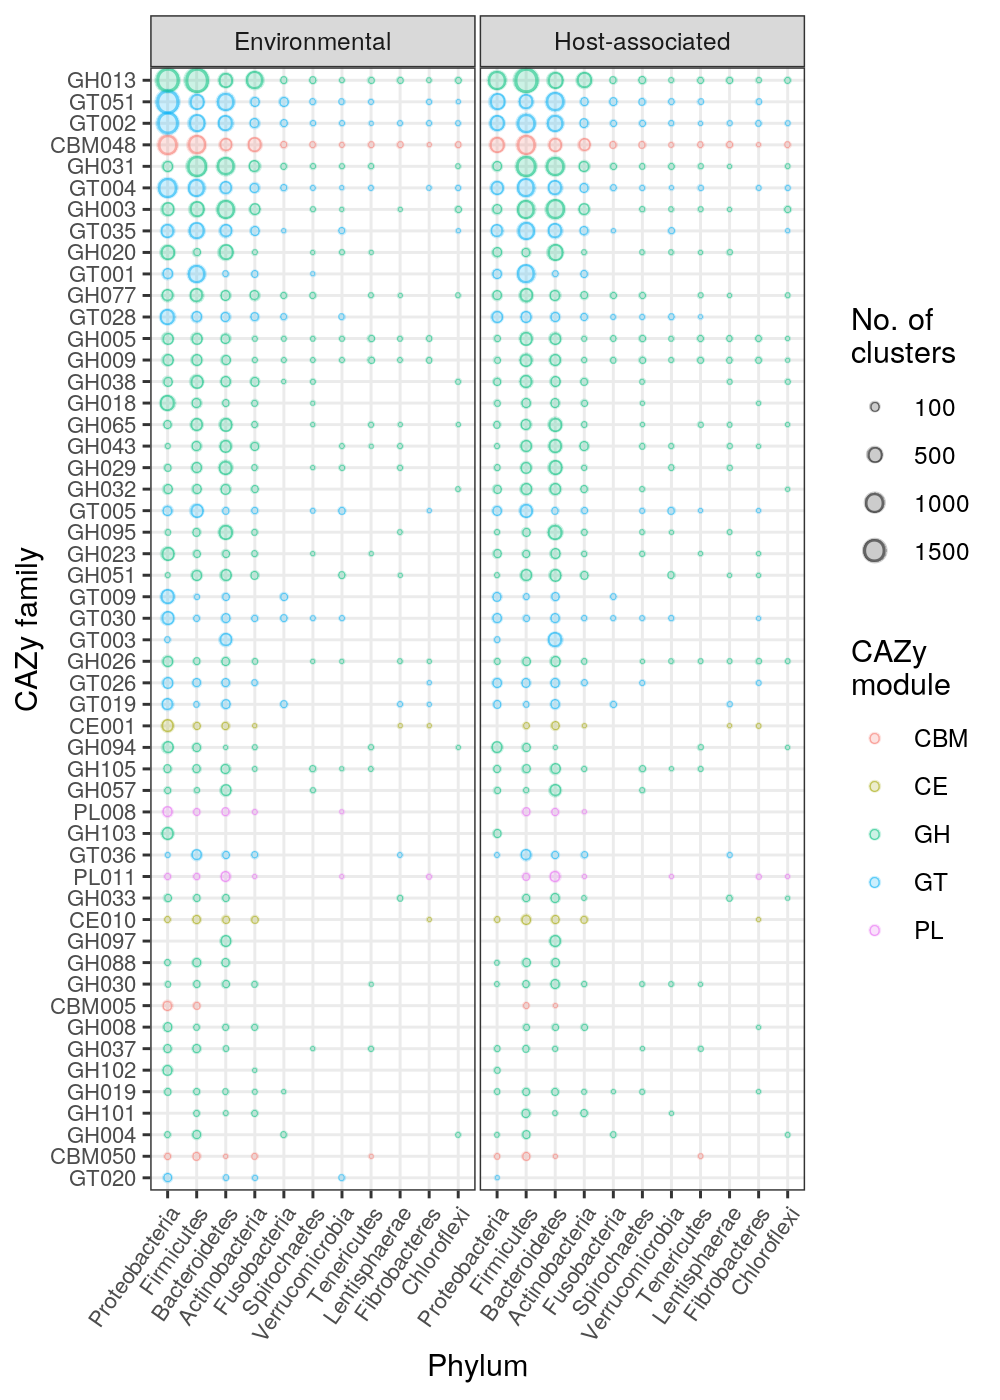

In [199]:
# plotting number of clusters
p = rpk_CAZy_s %>%
    dt_filter(n_clust_per_CAZy >= 100,
              n_clust_per_Phylum >= 50) %>%
    dt_mutate(Phylum = reorder(Phylum, -n_clust_per_Phylum),
              CAZy = reorder(CAZy, n_clust_per_CAZy)) %>%
    ggplot(aes(Phylum, CAZy, size=n_clust, color=CAZy_module)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of\nclusters', range=c(0.5, 4),
                          breaks=c(100, 500, 1000, 1500, 2000)) +
    scale_color_discrete('CAZy\nmodule') +
    facet_grid(. ~ biome_1) +
    labs(y='CAZy family', x='Phylum') +
    theme_bw() +
    theme(
        axis.text.x = element_text(size=8, angle=55, hjust=1),
        axis.text.y = element_text(size=8),
        panel.spacing = unit(0.1, "lines")
    )

p.dims(5,7)
plot(p)

Warning message:
“Removed 50 rows containing missing values (geom_point).”
Warning message:
“Removed 50 rows containing missing values (geom_point).”


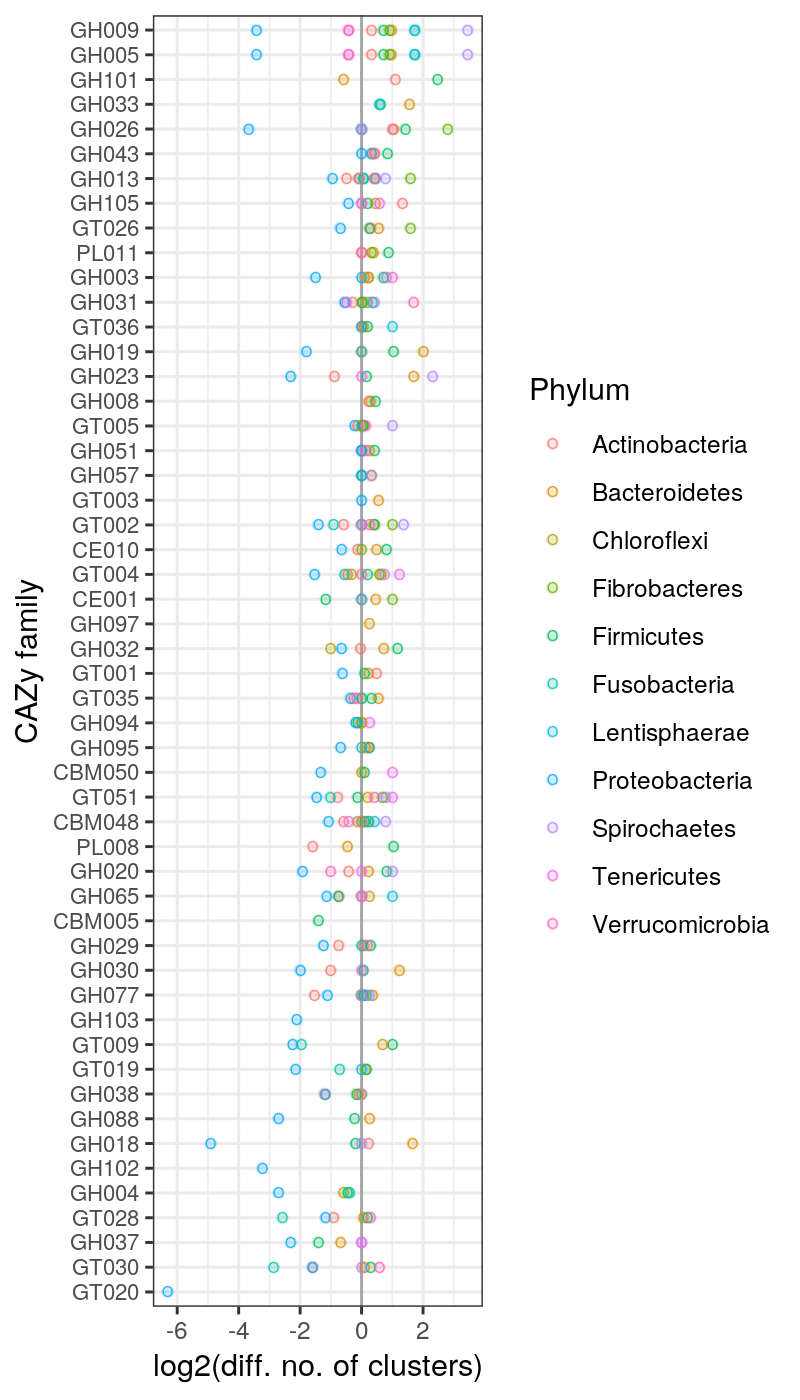

In [200]:
p = rpk_CAZy_s %>%
    dt_filter(n_clust_per_CAZy >= 100,
              n_clust_per_Phylum >= 50) %>%
    dt_pivot_wider(names_from=list(biome_1), values_from=list(n_clust)) %>%
    dt_mutate(delta_n_clust = log2(`Host-associated`/Environmental)) %>%
    dt_mutate(sum_delta_n_clust = sum(delta_n_clust, na.rm=TRUE), 
              by=list(CAZy)) %>%
    dt_mutate(CAZy = reorder(CAZy, sum_delta_n_clust)) %>%
    ggplot(aes(CAZy, delta_n_clust, color=Phylum)) +
    geom_hline(yintercept=0, alpha=0.3) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.8, shape='O') +
    scale_color_discrete('Phylum') +
    labs(y='log2(diff. no. of clusters)', x='CAZy family') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

p.dims(4,7)
plot(p)

Warning message:
“Removed 28 rows containing missing values (geom_bar).”


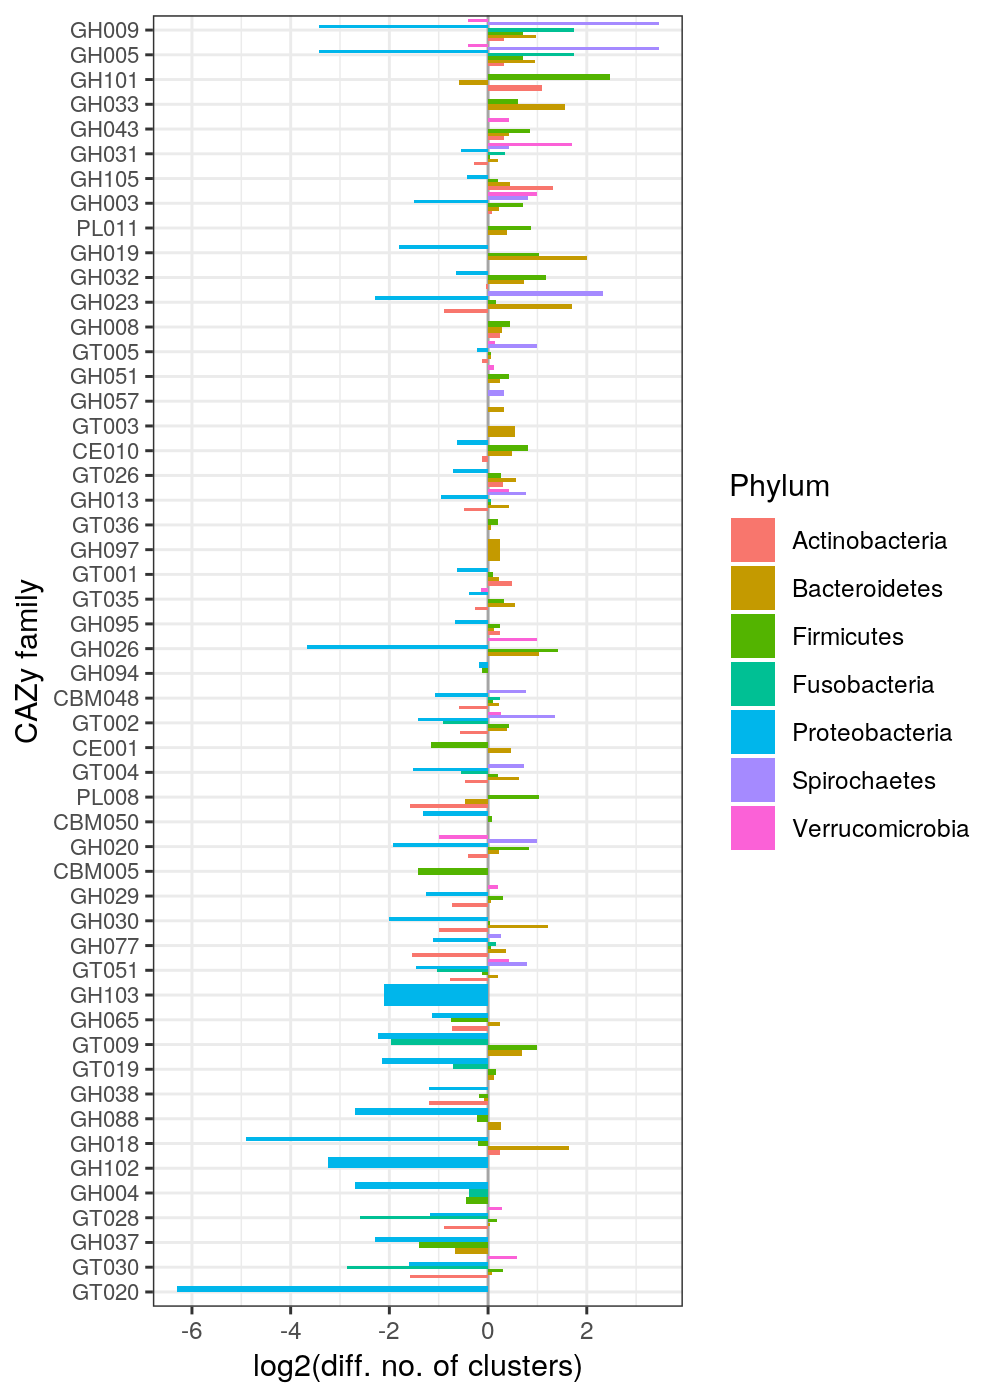

In [201]:
p = rpk_CAZy_s %>%
    dt_filter(n_clust_per_CAZy >= 100,
              n_clust_per_Phylum >= 100) %>%
    dt_pivot_wider(names_from=list(biome_1), values_from=list(n_clust)) %>%
    dt_mutate(delta_n_clust = log2(`Host-associated`/Environmental)) %>%
    dt_mutate(sum_delta_n_clust = sum(delta_n_clust, na.rm=TRUE), 
              by=list(CAZy)) %>%
    dt_mutate(CAZy = reorder(CAZy, sum_delta_n_clust)) %>%
    ggplot(aes(CAZy, delta_n_clust, fill=Phylum)) +
    geom_hline(yintercept=0, alpha=0.3) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='log2(diff. no. of clusters)', x='CAZy family') +
    #facet_grid(. ~ Phylum) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

p.dims(5,7)
plot(p)

#### Abundance of clusters

In [180]:
# summary of abundacnes
rpk_CAZy_s = rpk_CAZy %>%
    dt_filter(!is.na(CAZy)) %>%
    dt_distinct(seqid, biome_1, Domain, Phylum, CAZy, CAZy_module, perc_abund) %>%
    dt_mutate(max_total_abund = max(perc_abund, na.rm=TRUE),
              n_clusters = seqid %>% unique %>% length,
              by=list(CAZy, CAZy_module)) %>%
    dt_mutate(max_total_phylum = max(perc_abund, na.rm=TRUE),
              by=list(Domain, Phylum)) %>%
    dt_summarize(mean_perc_abund = mean(perc_abund, na.rm=TRUE),
                 stderr_perc_abund = sd(perc_abund, na.rm=TRUE) / sqrt(length(perc_abund)),
                 by=list(biome_1, Domain, Phylum, CAZy, CAZy_module, 
                         max_total_abund, max_total_phylum, n_clusters)) 

rpk_CAZy_s %>% dt_pull(CAZy) %>% unique_n('CAZy')
rpk_CAZy_s %>% dt_pull(Phylum) %>% unique_n('Phyla')
rpk_CAZy_s

No. of unique CAZy: 96 
No. of unique Phyla: 56 


biome_1,Domain,Phylum,CAZy,CAZy_module,max_total_abund,max_total_phylum,n_clusters,mean_perc_abund,stderr_perc_abund
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Environmental,Bacteria,Firmicutes,GH013,GH,0.005871388,0.003761178,5529,1.248920e-04,1.640079e-06
Environmental,Bacteria,Proteobacteria,GH018,GH,0.001393259,0.006405050,820,6.495602e-05,2.412550e-06
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Host-associated,Bacteria,Synergistetes,GH077,GH,0.002302203,0.001274383,1016,9.458228e-05,NA
Environmental,Bacteria,Synergistetes,GH077,GH,0.002302203,0.001274383,1016,1.285158e-04,2.563673e-05


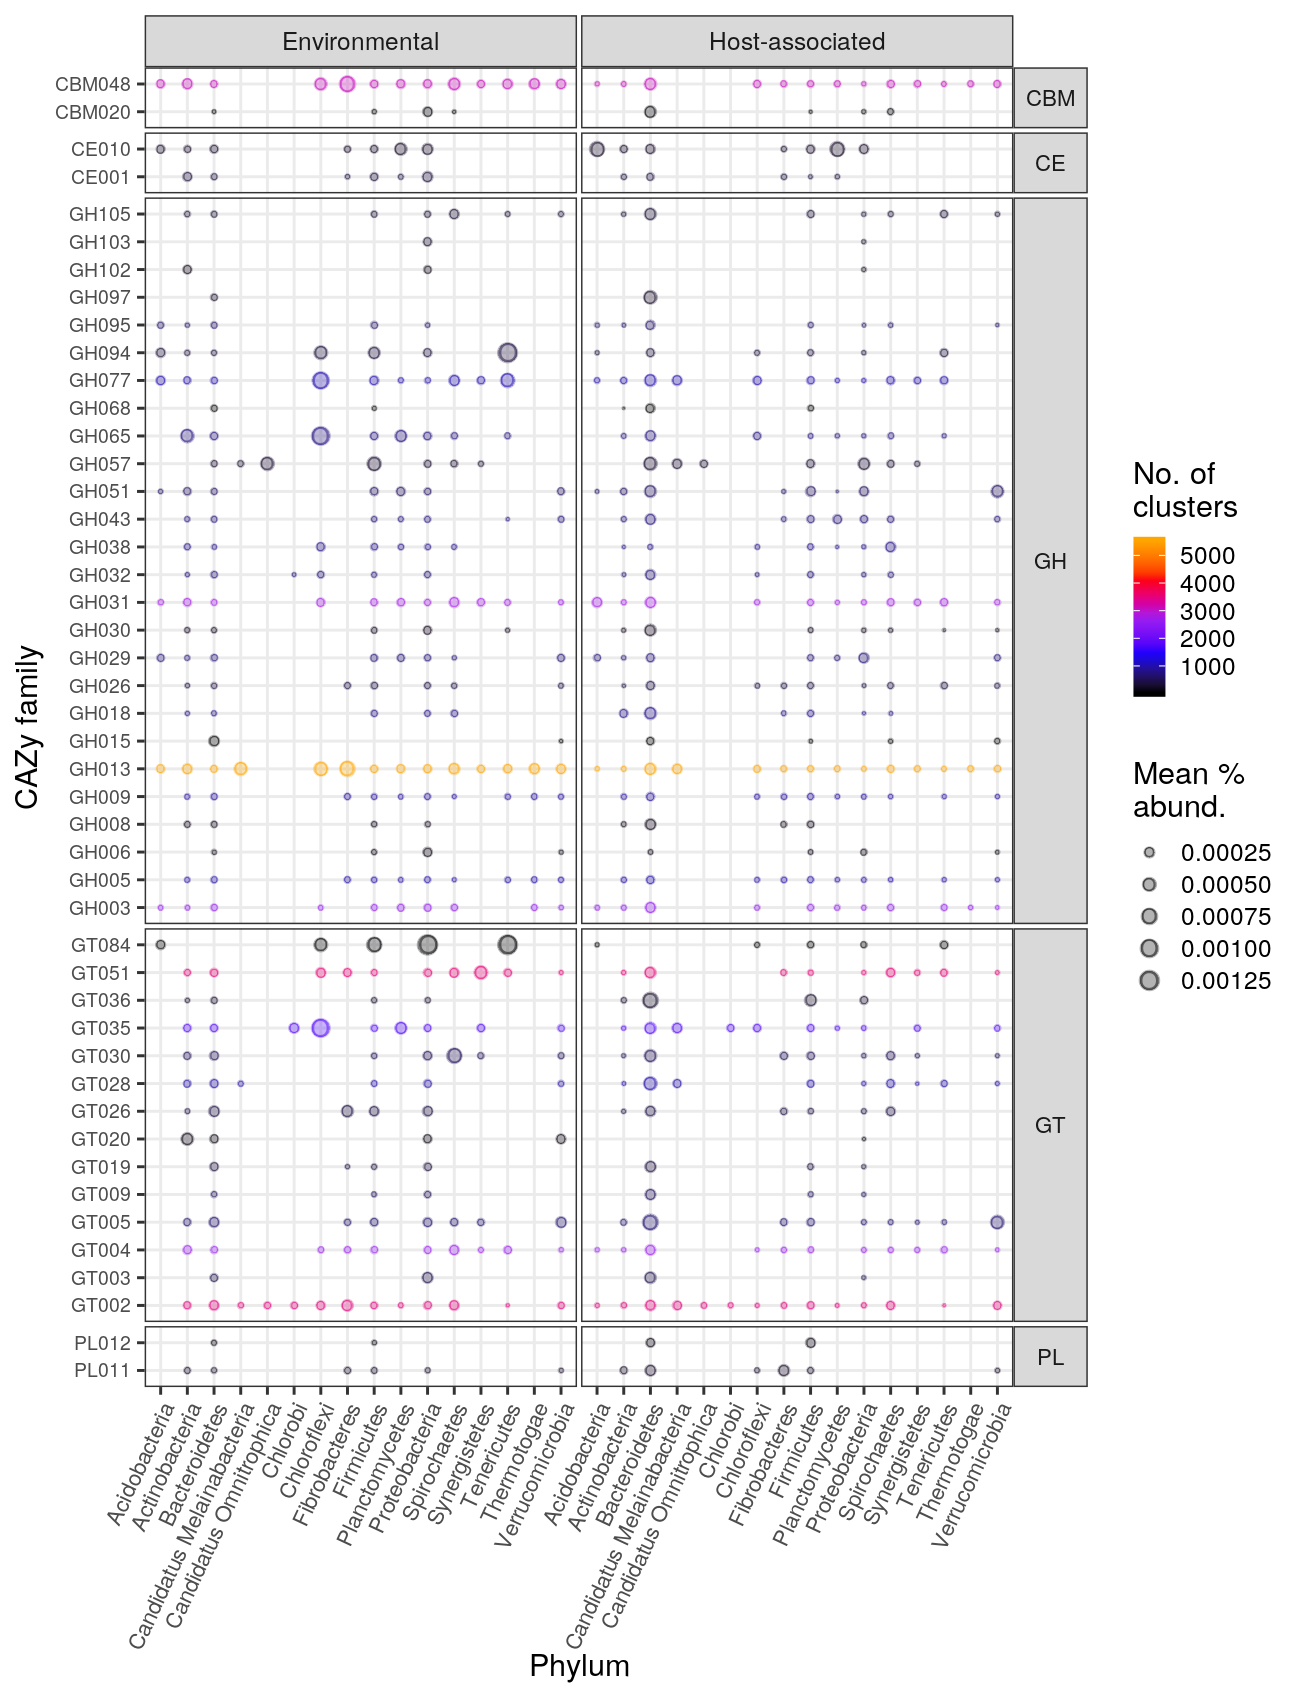

In [181]:
# plotting
p = rpk_CAZy_s %>%
    dt_filter(max_total_abund  >= 0.001,
              max_total_phylum >= 0.001) %>%
    ggplot(aes(CAZy, Phylum, size=mean_perc_abund, color=n_clusters)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('Mean %\nabund.', range=c(0.1, 3)) +
    scale_color_gradientn('No. of\nclusters', 
                          colours=c('black', 'blue', 'purple', 'red', 'orange')) +
    facet_grid(CAZy_module ~ biome_1, scales='free_y', space='free_y') +
    labs(x='CAZy family', y='Phylum') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1, size=8),
        axis.text.y = element_text(size=7),
        legend.key.size = unit(0.8, "line"),
        panel.spacing = unit(0.1, "lines"),
        strip.text.y = element_text(angle = 0, size=8)
    ) +
    coord_flip() 

p.dims(6.5,8.5)
plot(p)

In [183]:
rpk_CAZy_s %>%
    dt_filter(max_total_phylum >= 0.001) %>%
    dt_pivot_wider(names_from=list(biome_1), values_from=list(mean_perc_abund)) %>%
    dt_mutate(delta_abund = log2(`Host-associated`/Environmental))

Domain,Phylum,CAZy,CAZy_module,max_total_abund,max_total_phylum,n_clusters,stderr_perc_abund,Environmental,Host-associated,delta_abund
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Bacteria,Acidobacteria,CBM048,CBM,0.005871388,0.001181148,3084,1.420883e-05,NA,2.752133e-05,NA
Bacteria,Acidobacteria,CBM048,CBM,0.005871388,0.001181148,3084,3.475521e-05,0.0001470468,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Verrucomicrobia,PL011,PL,0.001715742,0.001693054,247,NA,2.821499e-05,NA,NA
Bacteria,Verrucomicrobia,PL011,PL,0.001715742,0.001693054,247,7.638103e-06,NA,3.149941e-05,NA


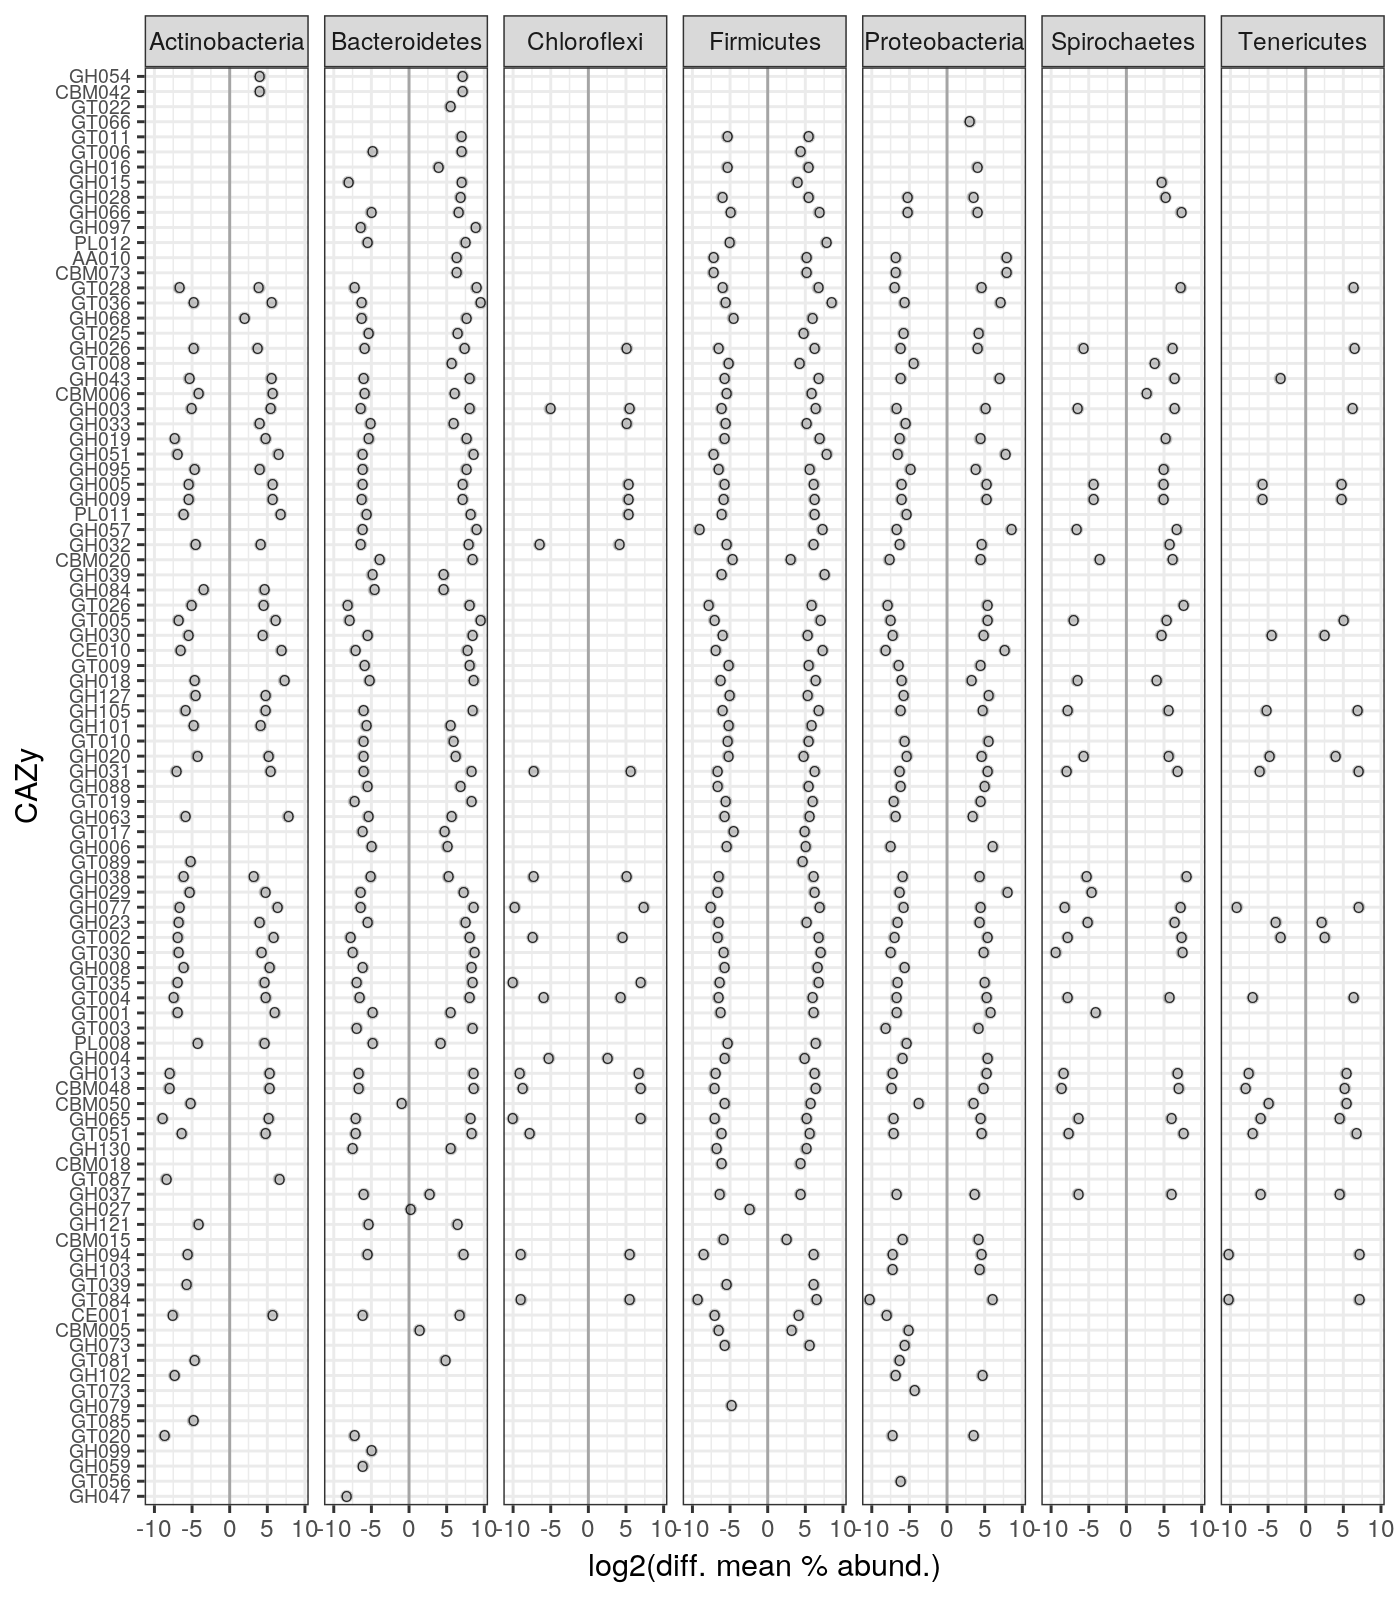

In [196]:
p = rpk_CAZy_s %>%
    dt_filter(max_total_phylum >= 0.002) %>%
    dt_pivot_wider(names_from=list(biome_1), values_from=list(mean_perc_abund)) %>%
    dt_mutate(`Host-associated` = ifelse(is.na(`Host-associated`), 1e-6, `Host-associated`),
              Environmental = ifelse(is.na(Environmental), 1e-6, Environmental)) %>%
    dt_mutate(delta_abund = log2(`Host-associated`/Environmental)) %>%
    dt_mutate(sum_delta_abund = mean(delta_abund, na.rm=TRUE), 
              by=list(CAZy)) %>%
    dt_mutate(CAZy = reorder(CAZy, sum_delta_abund)) %>%
    ggplot(aes(CAZy, delta_abund)) +
    geom_hline(yintercept=0, alpha=0.3) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.8, shape='O') +
    #geom_bar(stat='identity') +
    #scale_color_discrete('Phylum') +
    facet_grid(. ~ Phylum) +
    labs(y='log2(diff. mean % abund.)') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    ) +
    coord_flip()

p.dims(7,8)
plot(p)

In [202]:
# clearning memory
rm(rpk)
rm(rpk_s)
rm(rpk_CAZy)
rm(rpk_CAZy_s)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,4981520,266.1,20897312,1116.1,26121640,1395.1
Vcells,372208074,2839.8,2269731233,17316.7,3543292490,27033.2


# sessionInfo

In [197]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.2 tidytable_0.3.2   dtplyr_1.0.0      data.table_1.12.8
[5] ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3        plyr_1.8.5        pillar_1.4.3      compiler_3.6.2   
 [5] iterators_1.0.12  base